## Machine Learning Strategy

In [1]:
#Datos
import pandas as pd
import numpy as np


#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Modelos

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.ensemble import RandomForestRegressor

In [3]:
data_df = pd.read_csv("Xy_train.csv",sep=",")

#### EDA

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
#Controlo que el dataset se cargo correctamente

data_df_shape = np.shape(data_df)

print(f'Samples  =====> {data_df_shape[0]}')
print(f'Features =====> {data_df_shape[1]} ')

Samples  =====> 100
Features =====> 2 


In [6]:
#En busca de datos nullos
data_df.isnull().any()

X    False
y    False
dtype: bool

In [7]:
#cantidad de datos nulos
data_df.isnull().sum()

X    0
y    0
dtype: int64

In [8]:
data_df.describe()
#El 75% de los datos tienen valores inferiores a 6.68...
#la mediana tiene una valor de 3.99...  me dice que el 50% de los datos tiene una valor inferior a 3.99 

,X,y
count,100.000000,100.000000
mean,4.534694,5.073047
std,2.734487,2.398315
min,0.050223,-0.259323
25%,2.415300,3.735343
50%,3.999217,4.670649
75%,6.686171,5.761732
max,9.728298,13.930549


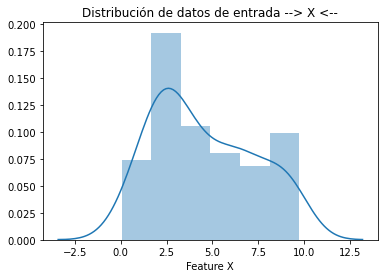

In [9]:
#analizo la distribucion de las features
sns.distplot(data_df.X)
plt.title('Distribución de datos de entrada --> X <--')
plt.xlabel('Feature X')
plt.show()

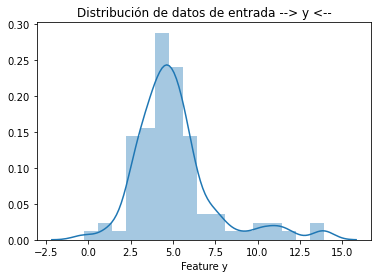

In [10]:
sns.distplot(data_df.y)
plt.title('Distribución de datos de entrada --> y <--')
plt.xlabel('Feature y')
plt.show()
#veo  que los feature y tiene una distribucion normal, es un buen indicativo que existe una correlacion entre los datos.
#el problema me parece que las prediciones lo va a tener con los datos superiores a 7.5 como lo indicaba la funcion decribe 

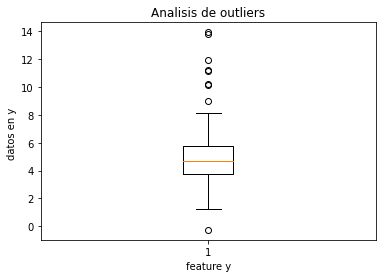

In [11]:
# el resultado anterior me mostro que la feature y, puede ser que tenga dispersion. analizo con un boxplot outliers
plt.boxplot(data_df.y)
plt.title('Analisis de outliers')
plt.ylabel('datos en y ')
plt.xlabel("feature y")
plt.show()

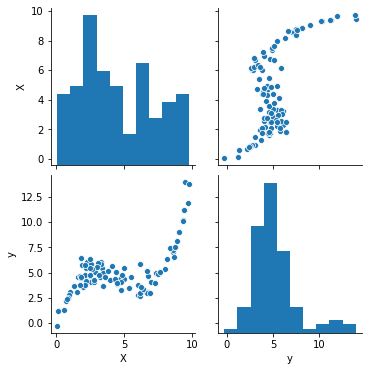

In [12]:
sns.pairplot(data_df)
plt.show()

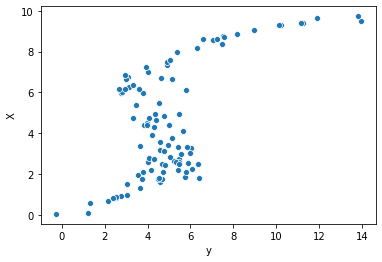

In [13]:

sns.scatterplot(data_df.y,data_df.X,palette='muted')
plt.show()


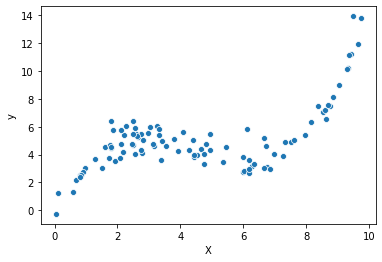

In [14]:

sns.scatterplot(data_df.X,data_df.y,palette='muted')
plt.show()

### Cargo datos de test (externo)

In [15]:
xtest_ext = pd.read_csv("X_test.csv",sep=",")

In [16]:
xtest_ext.head(3)

,X
0,6.170800
1,6.302022
2,8.689293


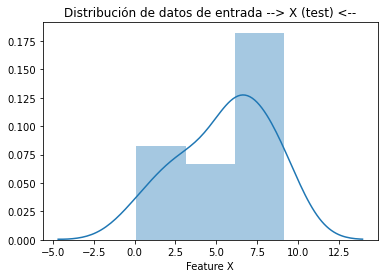

In [17]:
#analizo la distribucion de las features
sns.distplot(xtest_ext.X)
plt.title('Distribución de datos de entrada --> X (test) <--')
plt.xlabel('Feature X')
plt.show()

In [18]:
xtscaler = preprocessing.StandardScaler()

In [19]:
xtest_ext_scal = xtscaler.fit_transform(xtest_ext.values.reshape(-1,1))  

In [20]:
xtest_ext_scal

array([[ 0.25304312],
       [ 0.30209476],
       [ 1.19447251],
       [-1.16514287],
       [-1.04162874],
       [ 0.39701419],
       [ 1.12093404],
       [-2.01212641],
       [ 1.35601497],
       [-1.05356903],
       [-0.84145106],
       [ 0.34481206],
       [ 1.36996505],
       [-1.80706131],
       [-0.30333839],
       [ 0.97775236],
       [-0.19882624],
       [ 0.19437617],
       [ 0.61885656],
       [ 0.29380825]])

### Modeling

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(data_df.X, data_df.y, test_size=0.2, random_state=123)

In [22]:
xtrain.shape

(80,)

In [23]:
xtest.shape

(20,)

In [24]:
scaler = preprocessing.StandardScaler()

In [25]:
xtrain_scal = scaler.fit_transform(xtrain.values.reshape(-1,1))

In [26]:
xtest_scal = scaler.transform(xtest.values.reshape(-1,1))  

In [27]:
xtest_scal

array([[ 0.68503188],
       [ 1.36403784],
       [-0.83714246],
       [-1.39819904],
       [-0.79263528],
       [-0.91181318],
       [-0.53367151],
       [-0.71446905],
       [-1.10168334],
       [-0.32467983],
       [-0.05908774],
       [-0.96686847],
       [-0.83321298],
       [-0.81180394],
       [-0.77169218],
       [-0.54056551],
       [-1.42004271],
       [ 0.04772753],
       [-1.1883399 ],
       [ 0.99734689]])

In [28]:
ytrain

35    10.150170
88     4.744847
19     5.424035
29     2.764357
31     2.813019
        ...    
57     4.151968
83     2.959672
17     6.039839
92     7.570916
66     5.444029
Name: y, Length: 80, dtype: float64

#### Modelo KNN Regression Model

In [29]:
model_knn = KNeighborsRegressor()

In [30]:

#Definimos diccionario con hyperparametros

parameters_knn = [{'n_neighbors': [3,5,10],
                   "weights": ['uniform', 'distance'],
                   "metric": ['euclidean','manhattan','chebyshev','minkowski'],
                  'algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [31]:
#Definimos el objeto grid search con los parametros anteriores
knn_gs = GridSearchCV(model_knn, param_grid=parameters_knn, cv=5, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)

In [32]:
# Entrenamos
knn_gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'metric': ['euclidean', 'manhattan', 'chebyshev',
                                     'minkowski'],
                          'n_neighbors': [3, 5, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='neg_mean_squared_error', verbose=3)

In [33]:
print(knn_gs.best_params_)

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [34]:
# 3) Obtengo las predicciones que realiza mi modelo con las muestras de test
knn_ypred = knn_gs.predict(xtest_scal)

In [35]:
knn_ypred

array([3.65487916, 7.36888156, 4.88613521, 2.28532632, 4.88613521,
       4.78494689, 4.79274398, 5.08127877, 5.17073537, 4.94038037,
       3.99365163, 4.53672149, 4.88613521, 4.88613521, 4.67113426,
       4.79274398, 2.28532632, 4.20821593, 4.38634588, 5.09129957])

In [36]:
#Calculamos las metricas R2, MSE y MAE
knn_r2 = r2_score(y_true=ytest, y_pred=knn_ypred)
knn_mse = mean_squared_error(y_true=ytest, y_pred=knn_ypred)
knn_mae = mean_absolute_error(y_true=ytest, y_pred=knn_ypred)

In [37]:
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mae:.6f}')
print(f'MSE: {knn_mse:.6f}')

R2 score: 0.457547
MAE: 0.687965
MSE: 0.675282


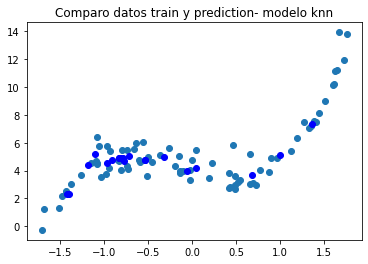

In [38]:
# el modelo  grafico
plt.scatter(xtrain_scal,ytrain)
plt.scatter(xtest_scal,knn_ypred,color='blue')
plt.title('Comparo datos train y prediction- modelo knn')
plt.show()

In [39]:
# 3) Obtengo las predicciones que realiza mi modelo con las muestras de test
knn_ypred_ext = knn_gs.best_estimator_.predict(xtest_ext_scal)

In [40]:
#Calculamos las metricas R2, MSE y MAE
knn_e_r2 = r2_score(y_true=ytest, y_pred=knn_ypred_ext)
knn_e_mse = mean_squared_error(y_true=ytest, y_pred=knn_ypred_ext)
knn_e_mae = mean_absolute_error(y_true=ytest, y_pred=knn_ypred_ext)

In [41]:
print(f'R2 score: {knn_e_r2:.6f}')
print(f'MAE: {knn_e_mae:.6f}')
print(f'MSE: {knn_e_mse:.6f}')

R2 score: -2.354507
MAE: 1.599636
MSE: 4.175920


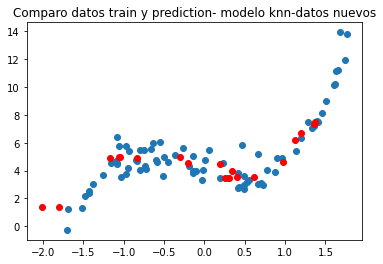

In [42]:
# el modelo lineal no sirve como se puede ver en el grafico
plt.scatter(xtrain_scal,ytrain)
plt.scatter(xtest_ext_scal,knn_ypred_ext,color='red')
plt.title('Comparo datos train y prediction- modelo knn-datos nuevos')
plt.show()

#### Modelo  SVR

In [43]:
model_svr = SVR()

In [44]:


#Definimos diccionario con hyperparametros

parameters_svr = [{ 'C': [1,100], 
                   'kernel':['rbf'] ,
                   'epsilon' : [0.001, 0.01, 0.1,1, 10,100] ,
                   'gamma': [0.01,0.1,0.5] }]

#Definimos el objeto grid search con los parametros anteriores

svr_gs = GridSearchCV(model_svr, param_grid=parameters_svr,cv=5, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)

In [45]:
# Entrenamos
svr_gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=5,
             param_grid=[{'C': [1, 100],
                          'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 0.5], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=3)

In [46]:
print(svr_gs.best_params_)

{'C': 100, 'epsilon': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [47]:
#Calculamos las metricas R2, MSE y MAE

svr_ypred = svr_gs.best_estimator_.predict(xtest_scal)
svr_r2 = r2_score(y_true=ytest, y_pred=svr_ypred)
svr_mse = mean_squared_error(y_true=ytest, y_pred=svr_ypred)
svr_mae = mean_absolute_error(y_true=ytest, y_pred=svr_ypred)

In [48]:
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mae:.6f}')
print(f'MSE: {svr_mse:.6f}')

R2 score: 0.596712
MAE: 0.541795
MSE: 0.502041


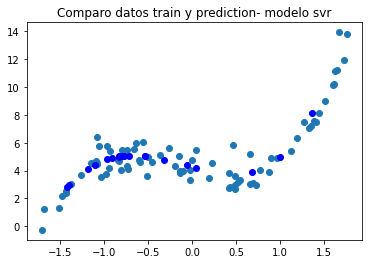

In [49]:
# el modelo grafico
plt.scatter(xtrain_scal,ytrain)
plt.scatter(xtest_scal,svr_ypred,color='blue')
plt.title('Comparo datos train y prediction- modelo svr')
plt.show()

In [50]:
#Calculamos las metricas R2, MSE y MAE

svr_ypred_ext = svr_gs.best_estimator_.predict(xtest_ext_scal)
svr_e_r2 = r2_score(y_true=ytest, y_pred=svr_ypred_ext)
svr_e_mse = mean_squared_error(y_true=ytest, y_pred=svr_ypred_ext)
svr_e_mae = mean_absolute_error(y_true=ytest, y_pred=svr_ypred_ext)

In [51]:
print(f'R2 score: {svr_e_r2:.6f}')
print(f'MAE: {svr_e_mae:.6f}')
print(f'MSE: {svr_e_mse:.6f}')

R2 score: -4.082750
MAE: 1.767550
MSE: 6.327355


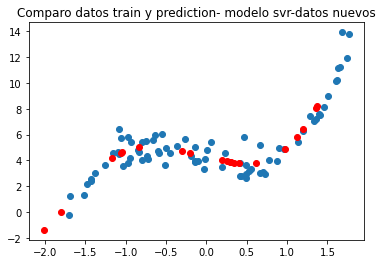

In [52]:
# el modelo grafico
plt.scatter(xtrain_scal,ytrain)
plt.scatter(xtest_ext_scal,svr_ypred_ext,color='red')
plt.title('Comparo datos train y prediction- modelo svr-datos nuevos')
plt.show()

#### Modelo Random Forest regressor

In [53]:
model_rfr = RandomForestRegressor()

In [54]:
#Definimos diccionario con hyperparametros

parameters_rfr = [{ 'criterion': ['mse', 'mae'], 
                   'max_features':['sqrt', 'log2'] ,
                   'random_state' : [10,20,30] ,
                   'n_estimators': [100, 200, 300, 1000] }]

#Definimos el objeto grid search con los parametros anteriores

rfr_gs = GridSearchCV(model_rfr, param_grid=parameters_rfr,cv=5, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)

In [55]:
rfr_gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 148 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 240 out of 240 | elapsed:   26.2s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid=[{'criterion': ['mse', 'mae'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 200, 300, 1000],
                          'random_state': [10, 20, 30]}],
             scoring='neg_mean_squared_error', verbose=3)

In [56]:
print(svr_gs.best_params_)

{'C': 100, 'epsilon': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [57]:

rfr_ypred = rfr_gs.best_estimator_.predict(xtest_scal)
rfr_r2 = r2_score(y_true=ytest, y_pred=rfr_ypred)
rfr_mse = mean_squared_error(y_true=ytest, y_pred=rfr_ypred)
rfr_mae = mean_absolute_error(y_true=ytest, y_pred=rfr_ypred)

In [58]:

print(f'R2 score: {rfr_r2:.6f}')
print(f'MAE: {rfr_mae:.6f}')
print(f'MSE: {rfr_mse:.6f}')

R2 score: 0.454217
MAE: 0.676820
MSE: 0.679428


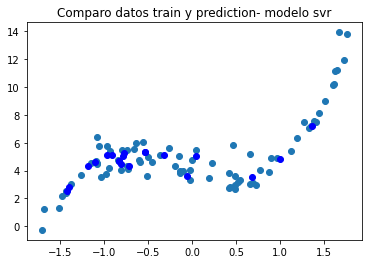

In [59]:
# el modelo grafico
plt.scatter(xtrain_scal,ytrain)
plt.scatter(xtest_scal,rfr_ypred,color='blue')
plt.title('Comparo datos train y prediction- modelo svr')
plt.show()

In [60]:
rfr_ypred_ext = rfr_gs.best_estimator_.predict(xtest_ext_scal)
rfr_e_r2 = r2_score(y_true=ytest, y_pred=rfr_ypred_ext)
rfr_e_mse = mean_squared_error(y_true=ytest, y_pred=rfr_ypred_ext)
rfr_e_mae = mean_absolute_error(y_true=ytest, y_pred=rfr_ypred_ext)

In [61]:
print(f'R2 score: {rfr_e_r2:.6f}')
print(f'MAE: {rfr_e_mae:.6f}')
print(f'MSE: {rfr_e_mse:.6f}')

R2 score: -2.702292
MAE: 1.563464
MSE: 4.608866


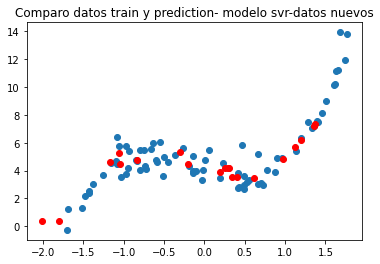

In [62]:
# el modelo grafico
plt.scatter(xtrain_scal,ytrain)
plt.scatter(xtest_ext_scal,rfr_ypred_ext,color='red')
plt.title('Comparo datos train y prediction- modelo svr-datos nuevos')
plt.show()

In [63]:

results_df = pd.DataFrame(columns=['Model','R2','MSE','MAE'])

In [64]:
results_df = results_df.append({'Model':'KNN Regression',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)

In [65]:

results_df = results_df.append({'Model':'SVR',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [66]:
results_df = results_df.append({'Model':'Random Forest regressor',
                                'R2':rfr_r2,
                                'MSE':rfr_mse,
                                'MAE':rfr_mae},ignore_index=True)

In [67]:
results_df

,Model,R2,MSE,MAE
0,KNN Regression,0.457547,0.675282,0.687965
1,SVR,0.596712,0.502041,0.541795
2,Random Forest regressor,0.454217,0.679428,0.676820


#### Los datos de test externo en el histograma muestra que hay muchos datos de 7.5 y en los datos de train pocos, esto me indica que el modelo no tuvo entrenamiento con esto tipo de datos, igualmente eligo el modelo de svr, porque se adapto mas a mi modelo de train

In [68]:
print(svr_ypred_ext)

[ 3.91154629e+00  3.85698003e+00  6.44238921e+00  4.17770119e+00
  4.61207256e+00  3.77710265e+00  5.83277236e+00 -1.39905811e+00
  8.05773133e+00  4.57677273e+00  5.00282409e+00  3.81632613e+00
  8.21330999e+00  4.05295534e-03  4.74504220e+00  4.88678327e+00
  4.58924632e+00  3.98575528e+00  3.79493807e+00  3.86564718e+00]
